# Analysis.ipynb   
### A project analysing the Iris dataset   
### Author: Paul O'Shaughnessy

***

### 1. Firstly, the various libraries to be used are imported:

- Pandas is a Python Library used for cleaning, analyzing and manipulating data. More information can be found [here](https://pandas.pydata.org/docs/)
- NumPy is a Python Library for working with arrays, linear algebra, and matrices. More information can be found [here](https://numpy.org/)
- Matplotlib is a comprehensive Python library for creating static, animated, and interactive visualizations in Python. More information can be found [here](https://matplotlib.org/)
- Seaborn is a Python data visualization library based on matplotlib. More information can be found [here](https://seaborn.pydata.org/)   
- Warnings is used to suppress unnecessary warnings. More information can be found [here](https://docs.python.org/3/library/warnings.html#temporarily-suppressing-warnings)

In [1]:
# Import Libraries to be used for analysis of dataset
import warnings
warnings.simplefilter(action='ignore', category=(FutureWarning, UserWarning))

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns
from seaborn import pairplot

### 2. The Iris dataset is then imported:

In [2]:
# Import iris dataset. Assign iris as the dataframe name.
iris = pd.read_csv('iris.data')


### 3. No Column names were in the dataset so they need to get added:

In [3]:
# Assign Column titles to dataset
iris.columns = [
                'sepal_length_cm', 
                'sepal_width_cm', 
                'petal_length_cm', 
                'petal_width_cm', 
                'class'
                ]

### 4. Check that the Column names have been added as expected:

In [4]:
# Check Column titles have assigned
iris.head(5)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


## 5. Summary Data

### 5.1 The describe() method outputs summary data for each numerical variable:

In [5]:
# Generate summary data for the numerical variables for all species combined.
iris.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### 5.1.2 To output the above data in a txt file, the code below is used:

In [6]:
# Assign a variable to the summary dataframe.
summary = iris.describe() 

# Export the summary dataframe as a txt file
summary.to_string('summary.txt')

### 5.2 Summary Data by Measurement Variable

In [28]:
iris.groupby(['class']).describe()['sepal_length_cm']

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
Iris-setosa,49.0,3.416327,0.384787,2.3,3.100,3.4,3.700,4.4
Iris-versicolor,50.0,2.770000,0.313798,2.0,2.525,2.8,3.000,3.4
Iris-virginica,50.0,2.974000,0.322497,2.2,2.800,3.0,3.175,3.8


In [29]:
iris.groupby(['class']).describe()['sepal_width_cm']

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
Iris-setosa,49.0,3.416327,0.384787,2.3,3.100,3.4,3.700,4.4
Iris-versicolor,50.0,2.770000,0.313798,2.0,2.525,2.8,3.000,3.4
Iris-virginica,50.0,2.974000,0.322497,2.2,2.800,3.0,3.175,3.8


In [30]:
iris.groupby(['class']).describe()['petal_length_cm']

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
Iris-setosa,49.0,1.465306,0.175061,1.0,1.4,1.50,1.600,1.9
Iris-versicolor,50.0,4.260000,0.469911,3.0,4.0,4.35,4.600,5.1
Iris-virginica,50.0,5.552000,0.551895,4.5,5.1,5.55,5.875,6.9


In [31]:
iris.groupby(['class']).describe()['petal_width_cm']

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
Iris-setosa,49.0,0.244898,0.108130,0.1,0.2,0.2,0.3,0.6
Iris-versicolor,50.0,1.326000,0.197753,1.0,1.2,1.3,1.5,1.8
Iris-virginica,50.0,2.026000,0.274650,1.4,1.8,2.0,2.3,2.5


### 5.3 Sumnmary Data by Species

In [32]:
# Summary data for Iris-setosa only
setosa = iris[iris['class'] == 'Iris-setosa'] 
setosa.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,49.000000,49.000000,49.000000,49.000000
mean,5.004082,3.416327,1.465306,0.244898
std,0.355879,0.384787,0.175061,0.108130
min,4.300000,2.300000,1.000000,0.100000
25%,4.800000,3.100000,1.400000,0.200000
50%,5.000000,3.400000,1.500000,0.200000
75%,5.200000,3.700000,1.600000,0.300000
max,5.800000,4.400000,1.900000,0.600000


In [33]:
# Summary data for Iris-versicolor only
setosa = iris[iris['class'] == 'Iris-versicolor'] 
setosa.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


In [34]:
# Summary data for Iris-virginica only
setosa = iris[iris['class'] == 'Iris-virginica'] 
setosa.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


## 6. Histograms

### 6.1 Histograms - All Species Combined 

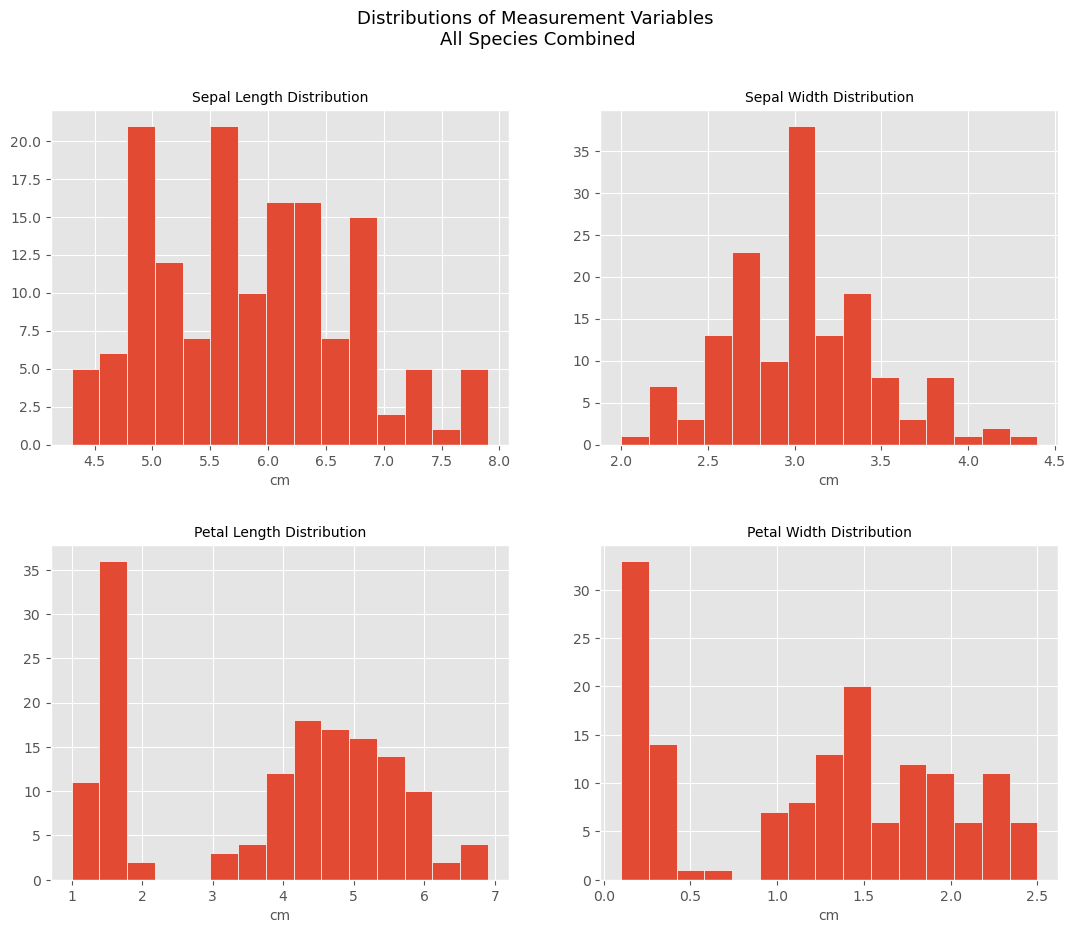

In [36]:
# Assign variables to each of the dataset measurement variables
sepal_l = iris['sepal_length_cm']
sepal_w = iris['sepal_width_cm']
petal_l = iris['petal_length_cm']
petal_w = iris['petal_width_cm']

# Use matplotlib to plot and style the figure that will house the histogram axes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(13, 10))
plt.style.use('ggplot')
plt.subplots_adjust(hspace=.3)

# Generate, format, and title the histogram axes for each measurement variable
axes[0, 0].hist(sepal_l, edgecolor='white', bins=15)
axes[0, 0].set_title('Sepal Length Distribution', fontsize=10)
axes[0, 0].set_xlabel('cm', fontsize=10)

axes[0, 1].hist(sepal_w, edgecolor='white', bins=15)
axes[0, 1].set_title('Sepal Width Distribution', fontsize=10)
axes[0, 1].set_xlabel('cm', fontsize=10)

axes[1, 0].hist(petal_l, edgecolor='white', bins=15)
axes[1, 0].set_title('Petal Length Distribution', fontsize=10)
axes[1, 0].set_xlabel('cm', fontsize=10)

axes[1, 1].hist(petal_w, edgecolor='white', bins=15)
axes[1, 1].set_title('Petal Width Distribution', fontsize=10)
axes[1, 1].set_xlabel('cm', fontsize=10)

# Generate a title for the overall figure
fig.suptitle('Distributions of Measurement Variables \nAll Species Combined', fontsize=13)

# Save a copy of the histograms as a png file
plt.savefig('histogram.png')

### 6.2 Histograms by Species

#### 6.2.1 Iris Setosa Distributions

Text(0.5, 0.98, 'Iris Setosa Distributions')

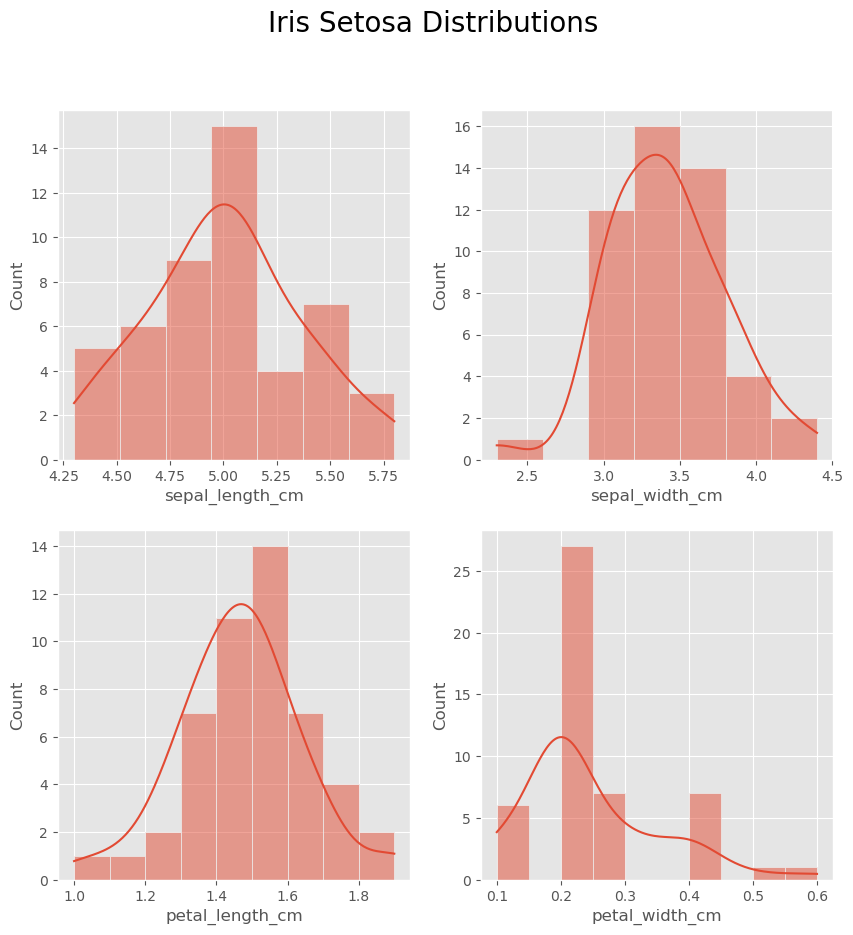

In [26]:
# Dataframe for Iris-setosa values only
setosa = iris[iris['class'] == 'Iris-setosa']

# Use matplotlib to plot and style the figure that will house the histogram axes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
plt.style.use('ggplot')


sns.histplot(data=setosa, x="sepal_length_cm", kde=True, ax=axes[0, 0])
sns.histplot(data=setosa, x="sepal_width_cm", kde=True, ax=axes[0, 1])
sns.histplot(data=setosa, x="petal_length_cm", kde=True, ax=axes[1, 0])
sns.histplot(data=setosa, x="petal_width_cm", kde=True, ax=axes[1, 1])

fig.suptitle('Iris Setosa Distributions', fontsize=20)

#### 6.2.2 Iris Versicolor Distributions

Text(0.5, 0.98, 'Iris Versicolor Distributions')

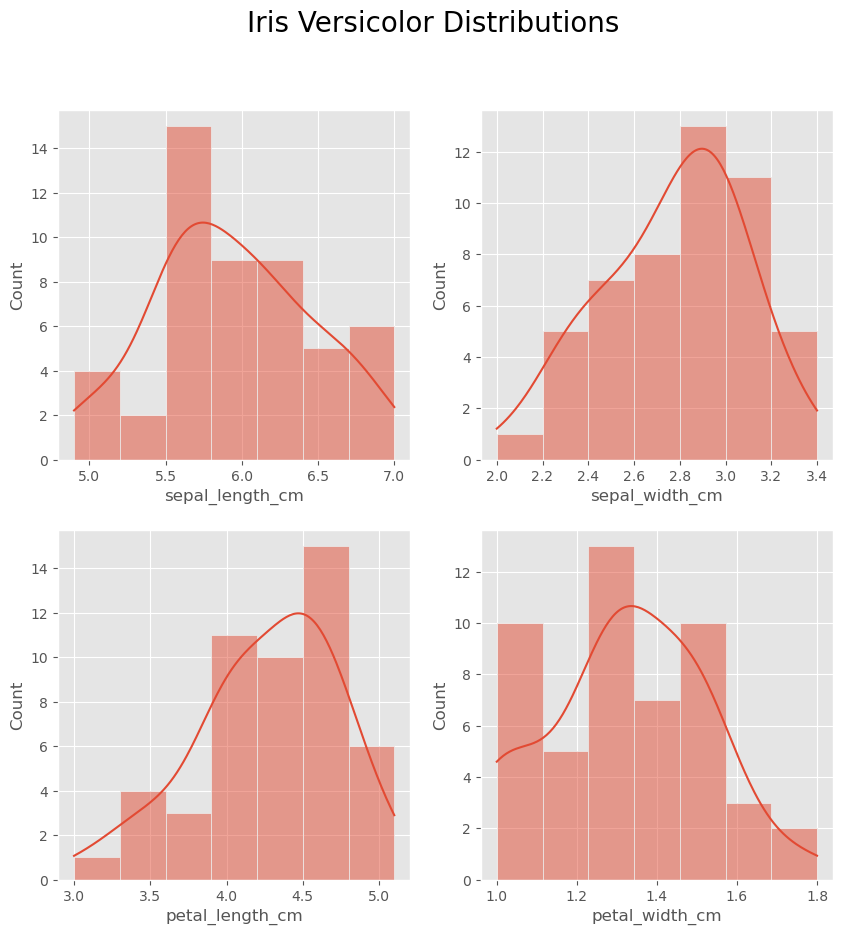

In [21]:
# Dataframe for Iris-versicolor values only
versicolor = iris[iris['class'] == 'Iris-versicolor']

# Use matplotlib to plot and style the figure that will house the histogram axes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
plt.style.use('ggplot')


sns.histplot(data=versicolor, x="sepal_length_cm", kde=True, ax=axes[0, 0])
sns.histplot(data=versicolor, x="sepal_width_cm", kde=True, ax=axes[0, 1])
sns.histplot(data=versicolor, x="petal_length_cm", kde=True, ax=axes[1, 0])
sns.histplot(data=versicolor, x="petal_width_cm", kde=True, ax=axes[1, 1])

fig.suptitle('Iris Versicolor Distributions', fontsize=20)

#### 6.2.3 Iris Virginica Distributions

Text(0.5, 0.98, 'Iris Virginica Distributions')

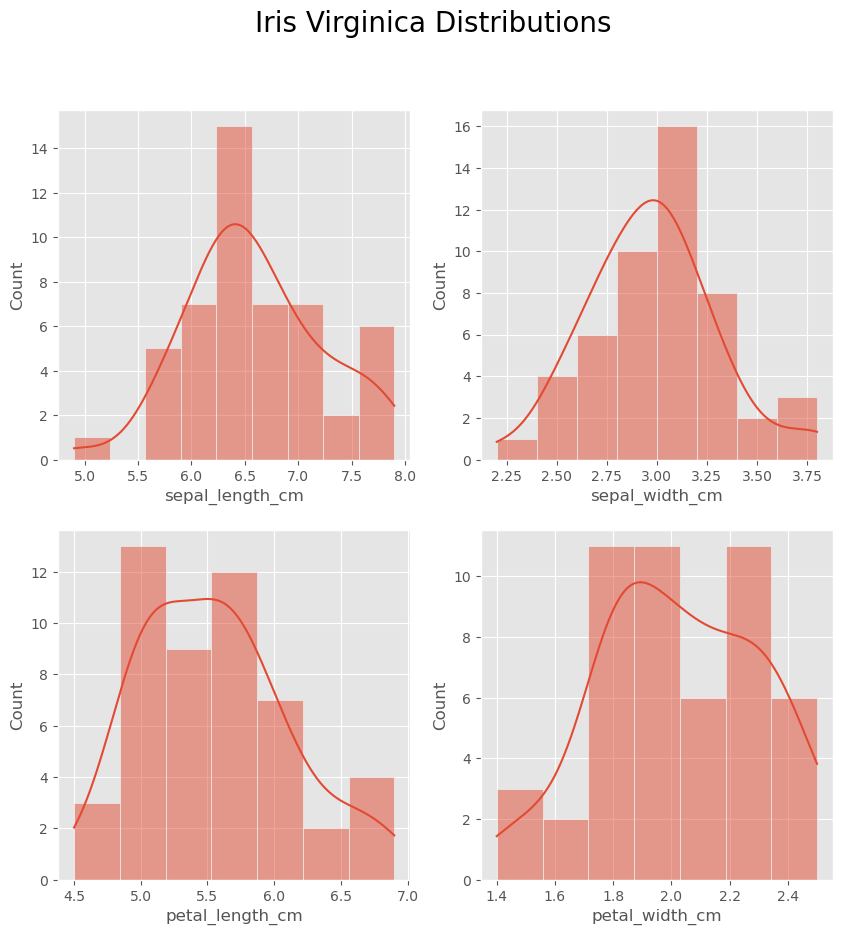

In [20]:
# Dataframe for Iris-virginica values only
virginica = iris[iris['class'] == 'Iris-virginica']

# Use matplotlib to plot and style the figure that will house the histogram axes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
plt.style.use('ggplot')


sns.histplot(data=virginica, x="sepal_length_cm", kde=True, ax=axes[0, 0])
sns.histplot(data=virginica, x="sepal_width_cm", kde=True, ax=axes[0, 1])
sns.histplot(data=virginica, x="petal_length_cm", kde=True, ax=axes[1, 0])
sns.histplot(data=virginica, x="petal_width_cm", kde=True, ax=axes[1, 1])

fig.suptitle('Iris Virginica Distributions', fontsize=20)